In [1]:
!pip install seaborn

     |████████████████████████████████| 294 kB 2.9 MB/s eta 0:00:01
     |████████████████████████████████| 17.3 MB 6.3 MB/s eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.4
    Uninstalling numpy-1.19.4:
      Successfully uninstalled numpy-1.19.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.0+nv requires numpy~=1.19.2, but you have numpy 1.24.4 which is incompatible.
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


In [2]:
pip install numpy==1.23.4

     |████████████████████████████████| 17.1 MB 6.2 MB/s eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.0+nv requires numpy~=1.19.2, but you have numpy 1.23.4 which is incompatible.
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

In [4]:
# Define hierarchical categories
categories = {
    "IAB1 Arts And Entertainment": ["IAB1_1_Books", "IAB1_5_Movies", "IAB1_6_Music"],
    "IAB2 Automotive": ["IAB2_11_Hatchback", "IAB2_14_MiniVan", "IAB2_15_Mororcycles", "IAB2_21_Trucks  Accessories"],
    "IAB3 Business": ["IAB3_6_Forestry"],
    "IAB17 Sports": ["IAB17_5_Boxing", "IAB17_6_CanoeING", "IAB17_7_Cheerleading", "IAB17_9_Cricket", "IAB17_11_Fly Fishing", "IAB17_12_Football", "IAB17_15_Golf", "IAB17_16_Horse Racing", "IAB17_29_Rugby", "IAB17_31_SailING", "IAB17_36_Snowboarding", "IAB17_37_Surfing", "IAB17_38_Swimming", "IAB17_39_Table Tennis", "IAB17_40_Tennis", "IAB17_41_Volleyball"]
}

In [5]:
# Data directories
train_dir = "/LAB/SGP-II/Dataset/train"
test_dir = "/LAB/SGP-II/Dataset/test"
val_dir = "/LAB/SGP-II/Dataset/val"

In [6]:
# Image dimensions
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# Learning rate
LEARNING_RATE = 0.001

In [7]:
# Data Generators
train_datagen = ImageDataGenerator(rescale=1.0/255)
val_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)

Found 2313 images belonging to 24 classes.
Found 280 images belonging to 24 classes.
Found 311 images belonging to 24 classes.


In [8]:
# Build the model
with tf.device("/GPU:1"):
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(len(train_generator.class_indices), activation='softmax')
    ])

2025-01-08 14:35:54.334603: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22118 MB memory:  -> device: 0, name: NVIDIA RTX A5000, pci bus id: 0000:3b:00.0, compute capability: 8.6
2025-01-08 14:35:54.336460: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 22118 MB memory:  -> device: 1, name: NVIDIA RTX A5000, pci bus id: 0000:af:00.0, compute capability: 8.6


In [9]:
optimizer = tf.keras.optimizers.SGD(learning_rate=LEARNING_RATE)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
with tf.device("/GPU:1"):
    import time

    # Start timing
    start_time = time.time()

    # Train the model
    history = model.fit(
        train_generator,
        validation_data=val_generator,
        epochs=100
    )

    # End timing
    end_time = time.time()

    # Calculate and print training time
    training_time = end_time - start_time
    print(f"Training time: {training_time:.2f} seconds")

2025-01-08 14:36:14.567555: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2025-01-08 14:36:15.963280: I tensorflow/stream_executor/cuda/cuda_dnn.cc:381] Loaded cuDNN version 8204
2025-01-08 14:36:18.215669: I tensorflow/stream_executor/cuda/cuda_blas.cc:1760] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


73/73 [==============================] - 10s 78ms/step - loss: 3.1547 - accuracy: 0.0571 - val_loss: 3.1284 - val_accuracy: 0.0571
Epoch 2/100
73/73 [==============================] - 5s 70ms/step - loss: 3.0996 - accuracy: 0.0986 - val_loss: 3.0729 - val_accuracy: 0.1607
Epoch 3/100
73/73 [==============================] - 5s 70ms/step - loss: 3.0231 - accuracy: 0.1652 - val_loss: 2.9962 - val_accuracy: 0.1786
Epoch 4/100
73/73 [==============================] - 5s 70ms/step - loss: 2.9221 - accuracy: 0.2036 - val_loss: 2.9106 - val_accuracy: 0.1821
Epoch 5/100
73/73 [==============================] - 5s 69ms/step - loss: 2.8028 - accuracy: 0.2399 - val_loss: 2.8240 - val_accuracy: 0.1857
Epoch 6/100
73/73 [==============================] - 5s 70ms/step - loss: 2.6748 - accuracy: 0.2650 - val_loss: 2.7152 - val_accuracy: 0.2214
Epoch 7/100
73/73 [==============================] - 5s 69ms/step - loss: 2.5556 - accuracy: 0.2888 - val_loss: 2.6139 - val_accuracy: 0.2679
Epoch 8/100
73/73

73/73 [==============================] - 5s 68ms/step - loss: 0.2342 - accuracy: 0.9602 - val_loss: 2.5026 - val_accuracy: 0.3821
Epoch 59/100
73/73 [==============================] - 5s 67ms/step - loss: 0.2670 - accuracy: 0.9395 - val_loss: 2.3659 - val_accuracy: 0.4214
Epoch 60/100
73/73 [==============================] - 5s 67ms/step - loss: 0.3801 - accuracy: 0.9261 - val_loss: 2.4645 - val_accuracy: 0.3857
Epoch 61/100
73/73 [==============================] - 5s 69ms/step - loss: 0.2165 - accuracy: 0.9650 - val_loss: 2.4968 - val_accuracy: 0.3893
Epoch 62/100
73/73 [==============================] - 5s 69ms/step - loss: 0.1971 - accuracy: 0.9615 - val_loss: 2.5193 - val_accuracy: 0.3786
Epoch 63/100
73/73 [==============================] - 5s 68ms/step - loss: 0.1726 - accuracy: 0.9736 - val_loss: 2.3759 - val_accuracy: 0.4143
Epoch 64/100
73/73 [==============================] - 5s 69ms/step - loss: 0.2550 - accuracy: 0.9516 - val_loss: 3.0610 - val_accuracy: 0.3357
Epoch 65/100

In [11]:
with tf.device("/GPU:1"):
    model.save('CNN_E100.h5')

In [12]:
with tf.device("/GPU:1"):
    start_time = time.time()

    # Evaluate the model
    test_loss, test_accuracy = model.evaluate(test_generator)
    print(f"Test Accuracy: {test_accuracy}")

    end_time = time.time()
    evaluating_time = end_time - start_time
    print(f"Evaluation time: {evaluating_time:.2f} seconds")

311/311 [==============================] - 1s 2ms/step - loss: 2.6910 - accuracy: 0.4598
Test Accuracy: 0.45980706810951233
Evaluation time: 0.89 seconds


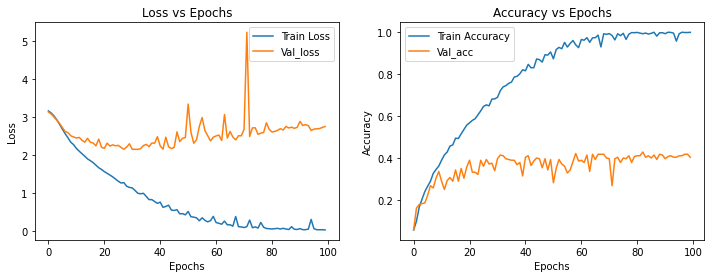

In [13]:
# Plot loss and accuracy
def plot_metrics(history):
    plt.figure(figsize=(12, 4))
    
    # Loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'],label='Val_loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss vs Epochs')
    plt.legend()
    
    # Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'],label = 'Val_acc')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs Epochs')
    plt.legend()

    plt.show()

plot_metrics(history)

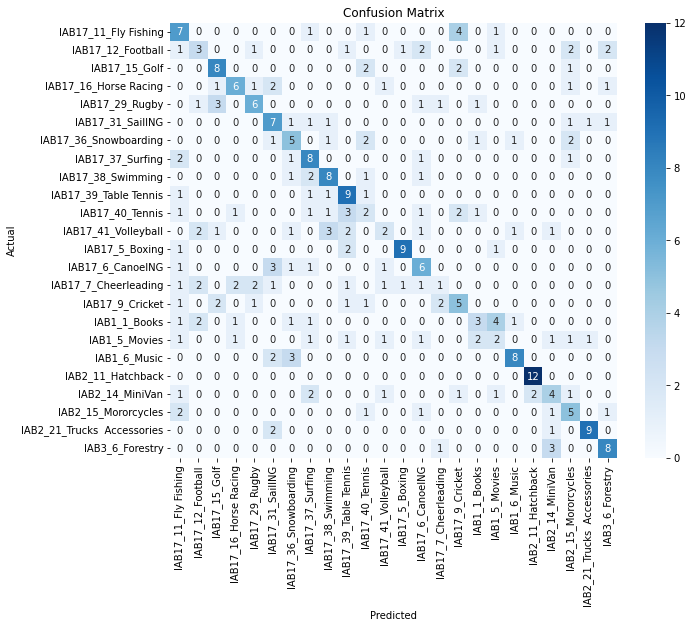

Testing time: 2.31 seconds


In [14]:
with tf.device("/GPU:1"):
    start_time = time.time()

    # Confusion matrix and classification report
    predictions = model.predict(test_generator)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = test_generator.classes
    class_labels = list(test_generator.class_indices.keys())
    conf_matrix = confusion_matrix(true_classes, predicted_classes)
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

    end_time = time.time()
    testing_time = end_time - start_time
    print(f"Testing time: {testing_time:.2f} seconds")

In [15]:
print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

Classification Report:
                             precision    recall  f1-score   support

       IAB17_11_Fly Fishing       0.33      0.50      0.40        14
          IAB17_12_Football       0.30      0.21      0.25        14
              IAB17_15_Golf       0.53      0.62      0.57        13
      IAB17_16_Horse Racing       0.55      0.46      0.50        13
             IAB17_29_Rugby       0.55      0.46      0.50        13
           IAB17_31_SailING       0.39      0.54      0.45        13
      IAB17_36_Snowboarding       0.36      0.38      0.37        13
           IAB17_37_Surfing       0.42      0.62      0.50        13
          IAB17_38_Swimming       0.53      0.62      0.57        13
      IAB17_39_Table Tennis       0.45      0.69      0.55        13
            IAB17_40_Tennis       0.18      0.15      0.17        13
        IAB17_41_Volleyball       0.29      0.14      0.19        14
             IAB17_5_Boxing       0.82      0.69      0.75        13
          

Sub Category: IAB2_11_Hatchback, Main Category: IAB2 Automotive


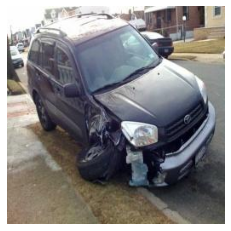

In [16]:
with tf.device("/GPU:1"):
    import cv2
    import numpy as np
    import matplotlib.pyplot as plt

    # Function to classify and display an image
    def classify_image(image_path, model, categories):
        # Read and preprocess the image
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        resized_image = cv2.resize(image, (IMG_WIDTH, IMG_HEIGHT)) / 255.0
        input_image = np.expand_dims(resized_image, axis=0)

        # Predict the class
        prediction = model.predict(input_image)
        predicted_class_index = np.argmax(prediction)
        predicted_class = class_labels[predicted_class_index]

        # Identify the main and subcategory
        for parent, subcategories in categories.items():
            if predicted_class in subcategories:
                print(f"Sub Category: {predicted_class}, Main Category: {parent}")
                break

        # Display the image
        plt.imshow(image)
        #plt.title(f"Predicted: {predicted_class}")
        plt.axis("off")
        plt.show()

    # Example usage
    image_path = "/LAB/SGP-II/Dataset/test/IAB2_14_MiniVan/XWHSFETMXAS3.jpg"
    classify_image(image_path, model, categories)

In [17]:
with tf.device("/GPU:1"):
    from tensorflow.keras.models import load_model

    # Load the saved model
    loaded_model = load_model("CNN_E75.h5")

    # Check the model structure
    loaded_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 186624)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               23888000  
_________________________________________________________________
dense_1 (Dense)              (None, 24)                3